## Loading basic Python and R imports

In [2]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# Answer the questions below. Explain your reasoning. 

In [3]:
%%R

require('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse


# Pollster Ratings

### 👉 Question 1: Are Gubernatorial Polls More Accurate Than Senate Polls?

In [4]:
%%R

# Data Documentation
# https://github.com/fivethirtyeight/data/tree/master/pollster-ratings
s_g_polls <- read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/pollster-ratings/raw_polls.csv', show_col_types = FALSE)  |> 
    select(poll_id, pollster, type_simple, location, cycle, margin_poll, margin_actual) |>  # select relevant columns
    filter(type_simple %in% c('Gov-G', 'Sen-G')) |> # filter to senate and governor races only
    filter(location!="US") |> # remove nationwide polls
    mutate(
        bias = margin_poll - margin_actual,
        error = abs(bias),
    )
    
s_g_polls


# A tibble: 8,543 × 9
   poll_id pollster  type_simple location cycle margin_poll margin_actual   bias
     <dbl> <chr>     <chr>       <chr>    <dbl>       <dbl>         <dbl>  <dbl>
 1   32945 YouGov    Sen-G       NE        2014      -27            -32.9   5.85
 2   33777 YouGov    Sen-G       NE        2014      -29            -32.9   3.85
 3   33068 Public P… Sen-G       MI        2014        7             13.3  -6.29
 4   33061 Suffolk … Sen-G       MI        2014        8.80          13.3  -4.49
 5   33037 Denno Re… Sen-G       MI        2014        7             13.3  -6.29
 6   33031 Mitchell… Sen-G       MI        2014        2             13.3 -11.3 
 7   33027 Magellan… Sen-G       MI        2014        5             13.3  -8.29
 8   33010 Rasmusse… Sen-G       MI        2014        2             13.3 -11.3 
 9   33007 Public P… Sen-G       MI        2014        7             13.3  -6.29
10   33008 We Ask A… Sen-G       MI        2014        3             13.3 -10.3 
# ℹ 8,

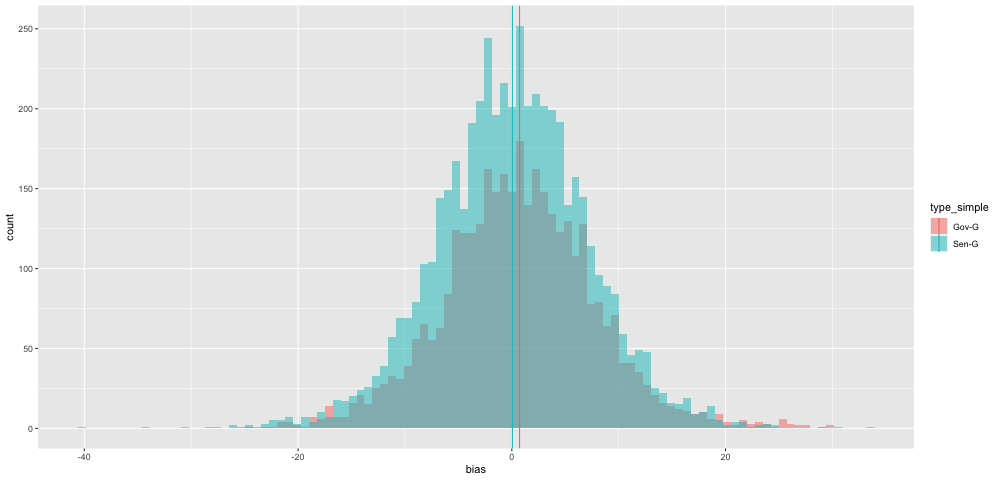

In [5]:
%%R -w 1000

mean_bias <- s_g_polls |> 
filter(!is.na(bias)) |>
    group_by(type_simple) |> 
    summarise(bias=mean(bias))

ggplot(s_g_polls) +
    aes(x=bias, fill=type_simple) +
    geom_histogram(alpha=.5, bins=100, position='identity') +
    geom_vline(data=mean_bias, aes(xintercept=bias, color=type_simple))

In [7]:
%%R 

# Run a t-test

NULL
